<a href="https://colab.research.google.com/github/sftSalman/AutoEncoder/blob/main/Basic_autoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Auto Encoder is a neural network thats able to learn an internal representatio without the supervsion

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def generate_data(m):
  """plots m random points on a 3D plane"""
  angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
  data = np.empty((m, 3))
  data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.rand(m)/2
  data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.rand(m) / 2
  data[:,2] = data[:,0] * 0.1 + data[:,1] * 0.3 + 0.1 * np.random.rand(m)

  return data

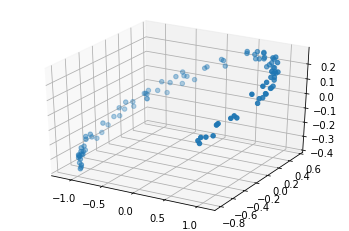

In [3]:
# use the function above to generate data points
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

# preview the data
ax = plt.axes(projection="3d")
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap="Reds")

In [4]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

autoencoder = keras.models.Sequential([encoder, decoder])


In [5]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [6]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 3s 6ms/step - loss: 0.5156
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3648
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2957
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2351
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1775
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1289
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0870
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0556
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0376
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0269
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0210
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0183
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

In [7]:
# encode the data
codings = encoder.predict(X_train)

# see a sample input-encoder output pair
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

input point: [-1.02866781 -0.18551531 -0.14953463]
encoded point: [-1.0103269  0.5477331]


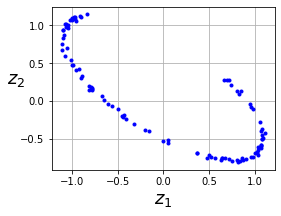

In [8]:
# plot all encoder outputs
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:, 0], codings[:, 1], 'b.')
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

In [9]:
# decode the encoder output
decodings = decoder.predict(codings)

# see a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

input point: [-1.02866781 -0.18551531 -0.14953463]
encoded point: [-1.0103269  0.5477331]
decoded point: [-1.0283598  -0.18522346 -0.15336186]


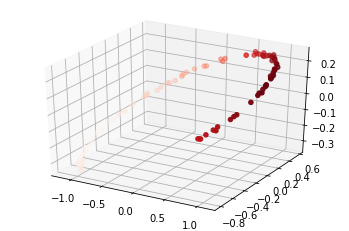

In [10]:
# plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap="Reds")